## Bartłomiej Kowalewski, 145204

### Homework

1. Read the description of the [Italian wine dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names). 
1. Download the dataset from http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data and load it into a pandas DataFrame. **Careful: the label is the first column in the dataset!**
1. Build a decision tree classifier and print out its accuracy. Instead of using a classical Decision Tree, you can experiment with [ExtraTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.ExtraTreeClassifier.html#sklearn.tree.ExtraTreeClassifier) or a Random Forest
1. Use the grid search to perform parameter space search and boost classifier's accuracy.
1. Perform the _bias vs variance_ analysis
1. Save your notebook as `firstname_lastname.ipynb` and upload it to the [shared folder](https://drive.google.com/drive/folders/12BZY9a0PXHh7hJMblz76mXtR6ZLI7-ee?usp=sharing)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import validation_curve, LearningCurve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 1. Loading the data

In [13]:
column_names =  ['label', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280_OD315', 'proline']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None, names = column_names)

df.head(10)

,label,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [14]:
y = df.pop('label')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

## 2. Building classifiers

In [15]:
params = { 
    'max_depth' : range(1, 15),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf' : range(2, 20)
}

### 2.1 DecisionTreeClassifier

#### 2.1.1 Basic model

In [16]:
model = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=5, 
    min_samples_leaf=5)

# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.792

confusion matrix
 [[36  8  0]
 [ 4 44  2]
 [ 0 12 19]]
              precision    recall  f1-score   support

           1       0.90      0.82      0.86        44
           2       0.69      0.88      0.77        50
           3       0.90      0.61      0.73        31

    accuracy                           0.79       125
   macro avg       0.83      0.77      0.79       125
weighted avg       0.82      0.79      0.79       125



#### 2.1.2 Grid Search

In [17]:
model_dtc = GridSearchCV(estimator = DecisionTreeClassifier(), 
                      cv=5,
                      param_grid=params, 
                      n_jobs=7)
model_dtc.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=7,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(2, 20)})

In [18]:
print(model_dtc.best_score_)

0.9276190476190477


In [19]:
model_dtc.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3)

In [20]:
model = model_dtc.best_estimator_
y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.992

confusion matrix
 [[44  0  0]
 [ 0 49  1]
 [ 0  0 31]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      0.98      0.99        50
           3       0.97      1.00      0.98        31

    accuracy                           0.99       125
   macro avg       0.99      0.99      0.99       125
weighted avg       0.99      0.99      0.99       125



#### 2.1.3 Visualizing the tree

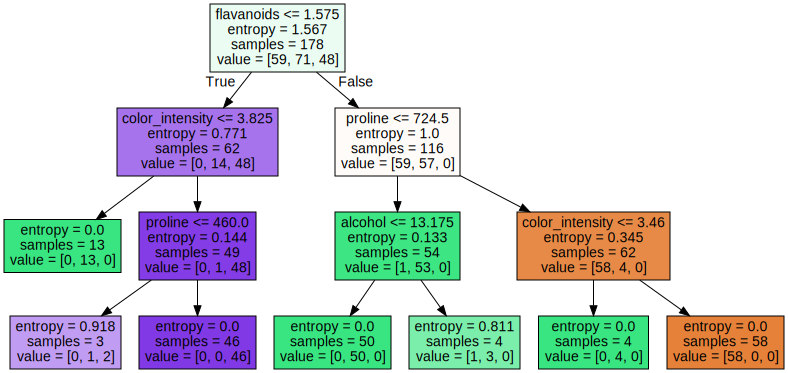

In [21]:
export_graphviz(model, 
                out_file = "model_dtc.dot", 
                filled=True,
                feature_names = X_train.columns)

with open("model_dtc.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 2.1.4 Bias vs Variance Analysis

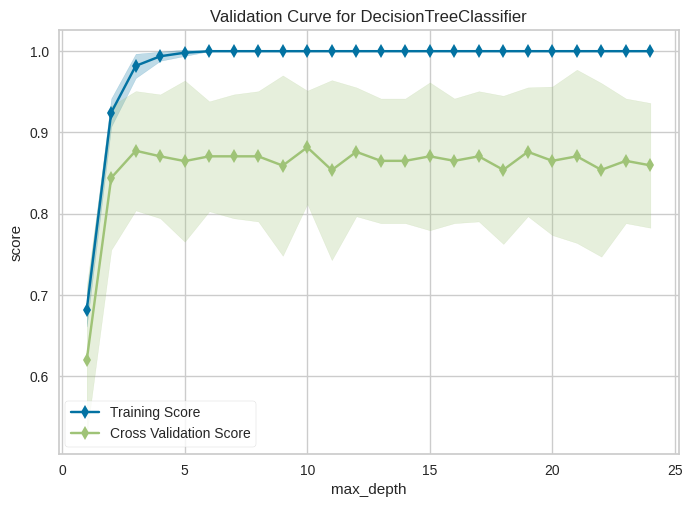

In [22]:
validationCurve = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth",
    param_range=np.arange(1, 25), cv=10, scoring="accuracy",
)

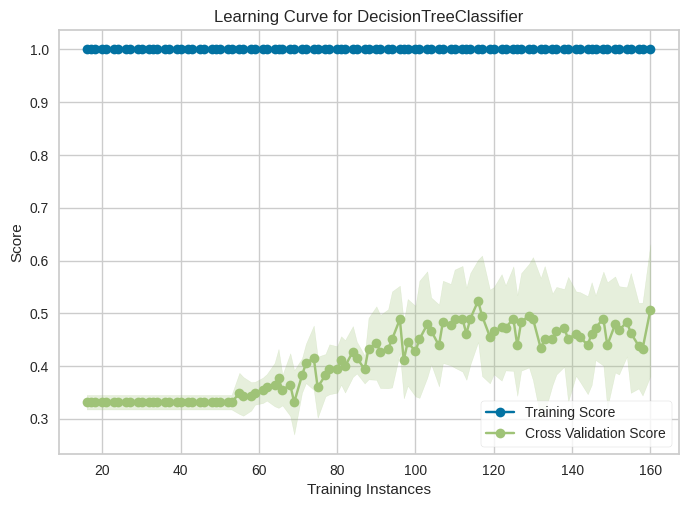

<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [23]:
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1.0, 100)

X_lc = OneHotEncoder().fit_transform(X)
y_lc = LabelEncoder().fit_transform(y)

model = DecisionTreeClassifier()
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=4
)

visualizer.fit(X_lc, y_lc)
visualizer.show()

### 2.2 RandomForestClassifier

#### 2.2.1 Basic model

In [24]:
model = RandomForestClassifier(
    criterion='gini', 
    max_depth=5, 
    min_samples_leaf=5)

# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.936

confusion matrix
 [[42  2  0]
 [ 3 45  2]
 [ 0  1 30]]
              precision    recall  f1-score   support

           1       0.93      0.95      0.94        44
           2       0.94      0.90      0.92        50
           3       0.94      0.97      0.95        31

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



#### 2.2.2 Grid Search

In [25]:
model_rfc = GridSearchCV(estimator = RandomForestClassifier(), 
                      cv=5,
                      param_grid=params, 
                      n_jobs=7)
model_rfc.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=7,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(2, 20)})

In [26]:
print(model_rfc.best_score_)

0.9833333333333332


In [27]:
model_rfc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3)

In [28]:
model = model_rfc.best_estimator_
y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 1.0

confusion matrix
 [[44  0  0]
 [ 0 50  0]
 [ 0  0 31]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        31

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125



#### 2.2.3 Bias vs Variance Analysis

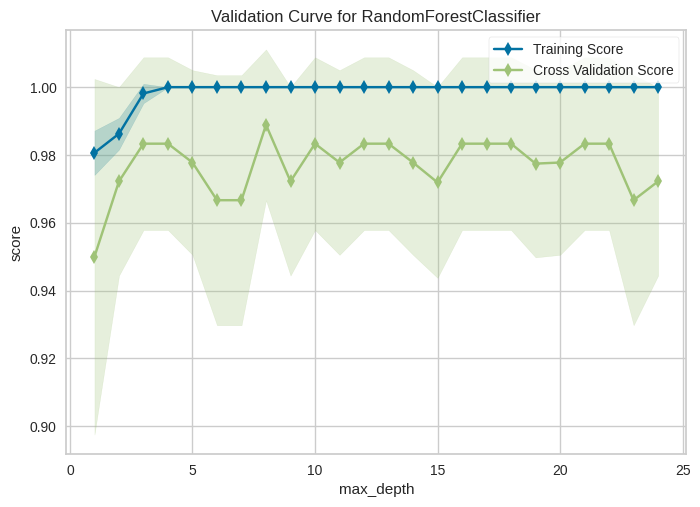

In [31]:
validationCurve = validation_curve(
    RandomForestClassifier(), X, y, param_name="max_depth",
    param_range=np.arange(1, 25), cv=10, scoring="accuracy",
)

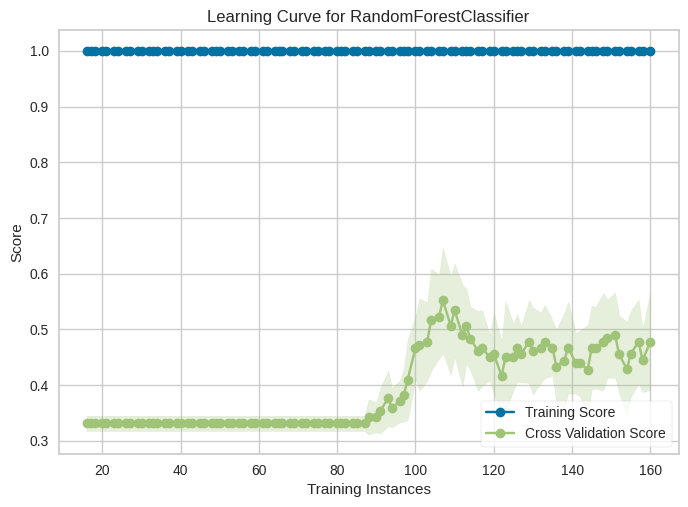

<Axes: title={'center': 'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [32]:
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1.0, 100)

X_lc = OneHotEncoder().fit_transform(X)
y_lc = LabelEncoder().fit_transform(y)

model = RandomForestClassifier()
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=4
)

visualizer.fit(X_lc, y_lc)
visualizer.show()

### 2.3 ExtraTreeClassifier

#### 2.3.1 Basic model

In [33]:
model = ExtraTreeClassifier(
    criterion='gini', 
    max_depth=5, 
    min_samples_leaf=5)

# train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.728

confusion matrix
 [[40  0  4]
 [16 33  1]
 [ 0 13 18]]
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        44
           2       0.72      0.66      0.69        50
           3       0.78      0.58      0.67        31

    accuracy                           0.73       125
   macro avg       0.74      0.72      0.72       125
weighted avg       0.73      0.73      0.72       125



#### 2.3.2 Grid Search

In [34]:
model_etc = GridSearchCV(estimator = ExtraTreeClassifier(), 
                      cv=5,
                      param_grid=params, 
                      n_jobs=7)
model_etc.fit(X, y)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(), n_jobs=7,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 15),
                         'min_samples_leaf': range(2, 20)})

In [35]:
print(model_etc.best_score_)

0.8938095238095238


In [36]:
model_etc.best_estimator_

ExtraTreeClassifier(criterion='log_loss', max_depth=13, min_samples_leaf=5)

In [37]:
model = model_etc.best_estimator_
y_pred = model.predict(X_test)

print(f'accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'confusion matrix\n {confusion_matrix(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

accuracy: 0.904

confusion matrix
 [[39  5  0]
 [ 1 45  4]
 [ 0  2 29]]
              precision    recall  f1-score   support

           1       0.97      0.89      0.93        44
           2       0.87      0.90      0.88        50
           3       0.88      0.94      0.91        31

    accuracy                           0.90       125
   macro avg       0.91      0.91      0.91       125
weighted avg       0.91      0.90      0.90       125



#### 2.3.5 Visualizing the tree

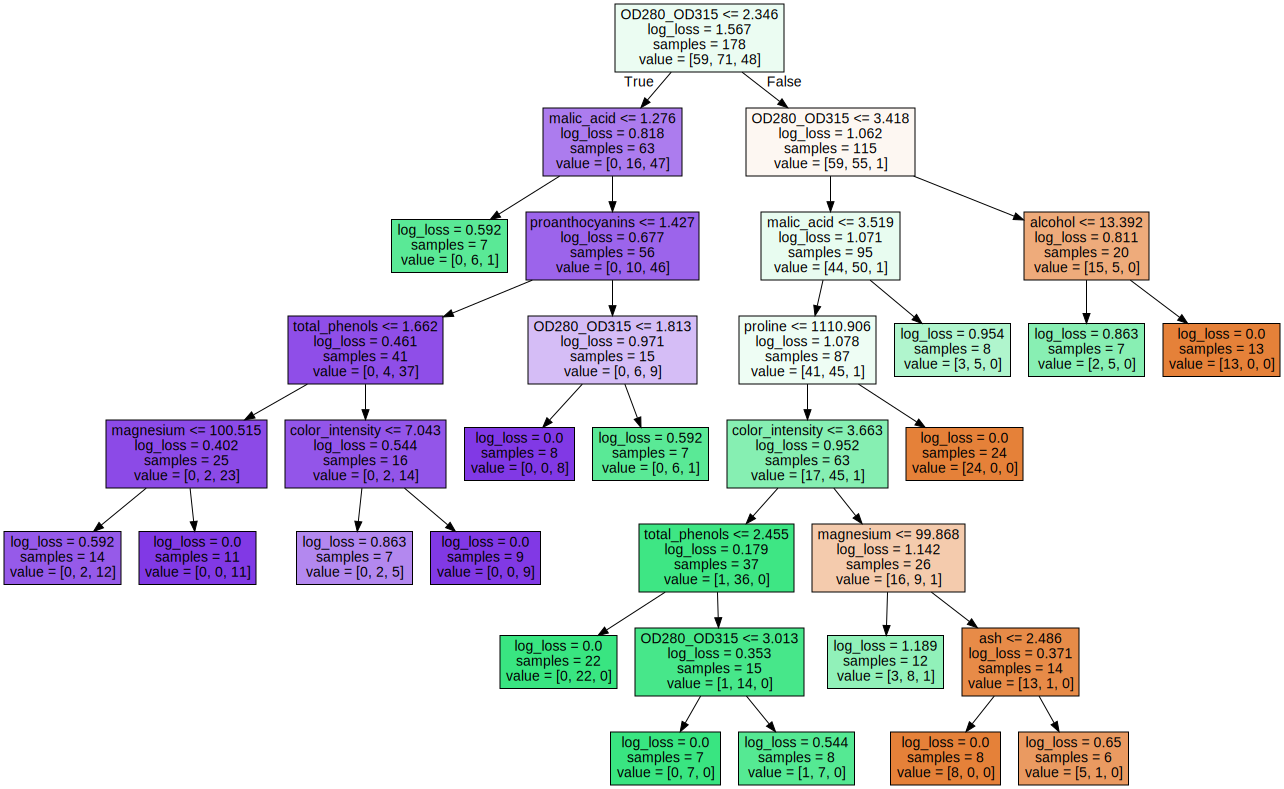

In [38]:
export_graphviz(model, 
                out_file = "model_etc.dot", 
                filled=True,
                feature_names = X_train.columns)

with open("model_etc.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 2.3.4 Bias vs Variance Analysis

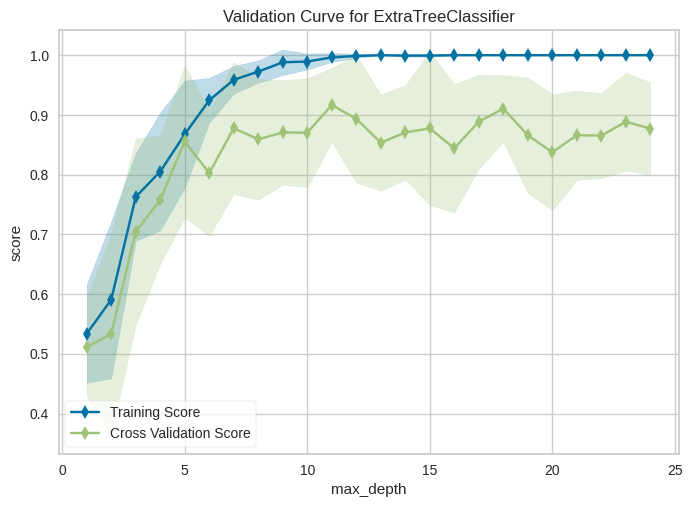

In [40]:
validationCurve = validation_curve(
    ExtraTreeClassifier(), X, y, param_name="max_depth",
    param_range=np.arange(1, 25), cv=10, scoring="accuracy",
)

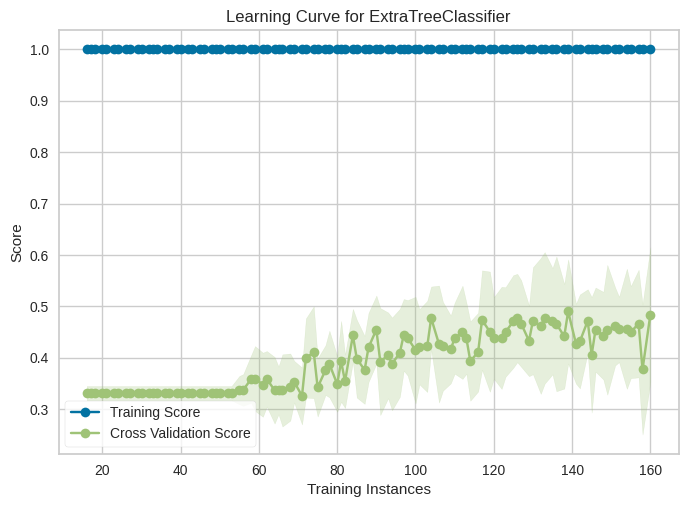

<Axes: title={'center': 'Learning Curve for ExtraTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [41]:
cv = StratifiedKFold(n_splits=10)
sizes = np.linspace(0.1, 1.0, 100)

X_lc = OneHotEncoder().fit_transform(X)
y_lc = LabelEncoder().fit_transform(y)

model = ExtraTreeClassifier()
visualizer = LearningCurve(
    model, 
    cv=cv, 
    scoring='accuracy', 
    train_sizes=sizes, 
    n_jobs=4
)

visualizer.fit(X_lc, y_lc)
visualizer.show()